# Import required libraries

In [26]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

# Upload and Unzip


In [27]:
# Upload Satellite Image Colorizer.zip to colab storage from left pane

!unzip -q Satellite\ Image\ Colorizer.zip

unzip:  cannot find or open Satellite Image Colorizer.zip, Satellite Image Colorizer.zip.zip or Satellite Image Colorizer.zip.ZIP.


# Defining Constants

In [28]:
# size of image on which model was trained
# me need to resize all the images to this size

IMAGE_DIMENSION = (128, 128)

# Loading trained autoencoder model

In [29]:
# load trained autoencoder

autoencoder = load_model('model/colorizer')

In [30]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
encoder (Functional)         (None, 65536)             369664    
_________________________________________________________________
decoder (Functional)         (None, 128, 128, 2)       960066    
Total params: 1,329,730
Trainable params: 1,329,730
Non-trainable params: 0
_________________________________________________________________


###Defining the functions to convert RGB image to L'Ab image and vice versa

In [31]:
from matplotlib import image
import numpy as np
from skimage.io import imread
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize

def L_AB2RGB(l, ab, dim):
    image = np.empty(dim + (3,))
    image[:,:,0] = l.reshape(dim)
    image[:,:,1:] = ab * 128
    return lab2rgb(image)

def RGB2L_AB(rgb, dim):
    rgb = rgb.reshape(dim+(3,))
    # /255 not required as resize returns in [0,1] range
    # rgb = rgb / 255
    lab = rgb2lab(rgb)
    l = np.empty(dim+(1,))
    ab = np.empty(dim+(2,))
    l = np.expand_dims(lab[:,:,0], axis=2)
    ab = lab[:,:,1:] / 128
    return l, ab

# Testing on images

In [50]:
test_image_dir = 'test_images'
testing_files = os.listdir(test_image_dir)
print('FOUND {} IMAGES'.format(len(testing_files)))

FOUND 11 IMAGES


In [51]:
CHOSEN_IMAGE_INDEX = 7
print('Testing on ', testing_files[CHOSEN_IMAGE_INDEX])
image_file_name = testing_files[CHOSEN_IMAGE_INDEX]

Testing on  sample7.jpg


In [ ]:
#from google.colab import files
#upload = files.upload()

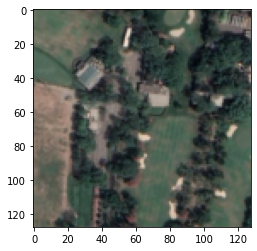

In [52]:
# reading image
image = imread('test_images/'+image_file_name)
# some images have 4 channels for transparency (like png images), discarding 4th channel
image = image[:,:,:3]
# resizing image to required dimension
image = resize(image, IMAGE_DIMENSION)

# plotting image
plt.imshow(image)

## RGB to LAB

This step is required if you are testing on color image

As we have color image, so we will be first converting to LAB \
L - Lightness (Black and White) \
A, B -  Color

We will pass L to autoencoder which will predict A', and B'. To get full RGB image we will convert LA'B' to RGB

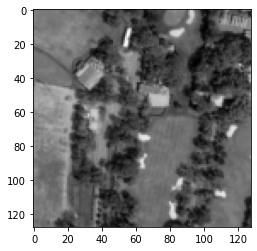

In [53]:
# converting to lab color 
l, ab = RGB2L_AB(image, IMAGE_DIMENSION)

# plotting l channel (black and white)
plt.imshow(l.reshape(IMAGE_DIMENSION), cmap='gray')

## Predicting color from grayscale image (L)

In [54]:
# predicting color of black and white image

predicted_ab = autoencoder.predict(np.expand_dims(l, axis=0))

## Converting LA'B' to RGB

In [55]:
# converting LA'B' to RGB

colorized_image = L_AB2RGB(l, predicted_ab[0], IMAGE_DIMENSION)
print("FInal color image shape ",colorized_image.shape)

FInal color image shape  (128, 128, 3)


## Result Comparision

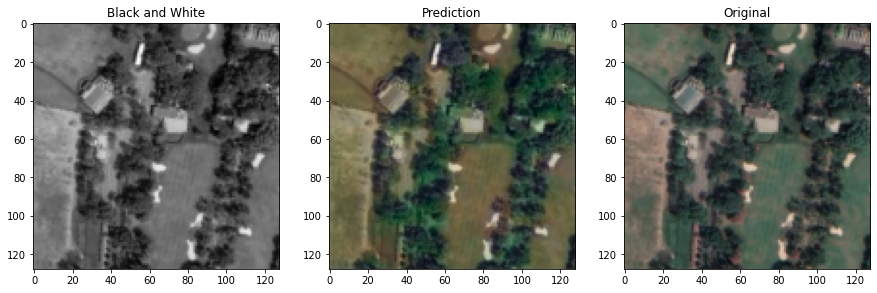

In [56]:
# plotting all images

plt.figure(figsize=(15,18))
plt.subplot(1,3,1)
plt.imshow(l.reshape(IMAGE_DIMENSION), cmap='gray')
plt.title('Black and White')

plt.subplot(1,3,2)
plt.imshow(colorized_image)
plt.title('Prediction')

plt.subplot(1,3,3)
plt.imshow(image)
plt.title('Original')

plt.show()